In [1]:
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [2]:
CSD=load("CSDEvocada.jld", "CSD")
CSDPlanchado=load("CSDEvocada.jld", "CSDPlanchada")
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];

In [3]:
#Las esquinas del cuadro
xizq=22
xder=48
ybajo=4
yalto=30
retraso=35
tmax=size(CSDPromedio)[3]
tiemposinteresantes=(28,63,70,77,84,91,98,105)

(28,63,70,77,84,91,98,105)

In [4]:
CatenarioPositivo=load("CatenariosEvocados-Promedio-3.jld", "CatenarioPositivo")
CatenarioNegativo=load("CatenariosEvocados-Promedio-3.jld", "CatenarioNegativo");

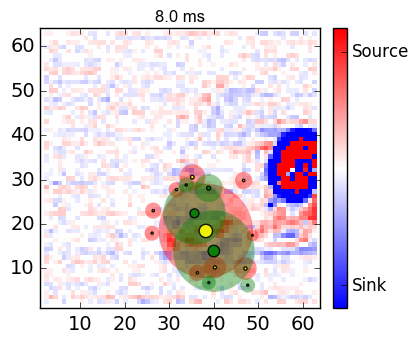

false

In [5]:
cuadro=91

CSDEjemplo=CSDPromedio[:,:,cuadro];
map!(x->abs(x)<10? 0:x, CSDEjemplo)

PyPlot.ion()
#################
font1 = Dict("family"=>"Arial",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12)
seg=round((cuadro-35)/7.022, 1)
titulo="$seg ms"
figure(figsize=(4,3.5))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
limcsd=180

otraimagen=imshow(CSDEjemplo, cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[1,64,1,64])

cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04)
farofa=cb[:set_ticklabels](["Sink", "Source"])


EjemploCentrosCSDPos=readdlm("CenterOfMassCollector/CMFuentes-$cuadro.dat")
xxpos=EjemploCentrosCSDPos[:,1]+xizq
yypos=EjemploCentrosCSDPos[:,2]+ybajo
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("CenterOfMassCollector//CMPozos-$cuadro.dat")
xxneg=EjemploCentrosCSDNeg[:,1]+xizq
yyneg=EjemploCentrosCSDNeg[:,2]+ybajo
valorneg=EjemploCentrosCSDNeg[:,3];

scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")

scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="green", edgecolors="black")

tick_params(axis="both", labelsize=14)

title(titulo, fontdict=font1)
 #tight_layout()
#savefig("CSDParaDisjoint-$cuadro.svg", dpi=90)
PyPlot.close_queued_figs()

In [6]:
Componentes91=readdlm("ComponenteCollector/CompNeg-91.dat");
SubDatos=CSDPromedio[ybajo:yalto, xizq:xder,1:tmax];

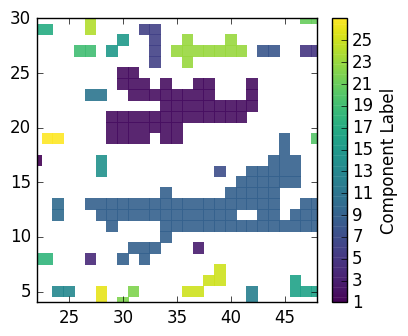

In [7]:
ion()
figure(figsize=(4.0,3.55))

font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>24)
limcsd=180

milisec=round((cuadro-retraso)/7.022,1)

 #title("t= $milisec ms", fontdict=font1)

PyPlot.xlim(xizq,xder)
PyPlot.ylim(ybajo,yalto)
#otraimagen=imshow(SubDatos, cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
#interpolation="nearest", extent=[xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5])
xxpos=Componentes91[:,1]+xizq-1
    yypos=Componentes91[:,2]+ybajo-1
colores=Componentes91[:,4]
normcolor=maximum(colores)
colorete=colores/normcolor
pinpun=scatter(xxpos,yypos,c=colores,cmap="viridis", linewidth=0,marker="s",alpha=0.9, s=70)
cb=colorbar(pinpun,fraction=0.046, ticks=1:2:26)
cb[:set_label]("Component Label")
#savefig("ComponentesNegativosEtiquetados-$cuadro.svg",dpi=90)

In [8]:
SubPos=map(x->x>15?x:0,SubDatos);
SubNeg=map(x->x<-15?x:0,SubDatos);

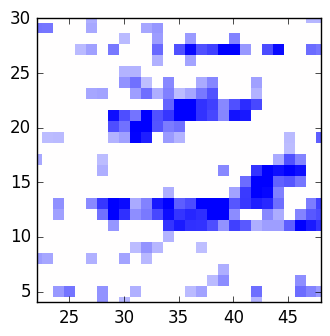

In [9]:

figure(figsize=(4.0,3.55))
limcsd=60
PyPlot.xlim(xizq,xder)
PyPlot.ylim(ybajo,yalto)
otraimagen=imshow(SubNeg[:,:,91], cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5])

cb[:set_label]("Component Label")
#savefig("ComponentesNegativos-$cuadro.svg",dpi=90)

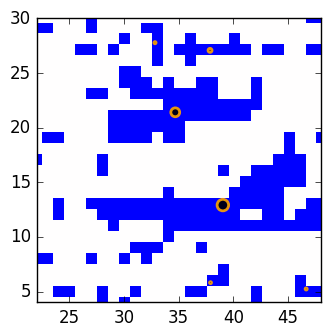

PyObject <matplotlib.collections.PathCollection object at 0x7f695fb079b0>

In [10]:

figure(figsize=(4.0,3.55))
limcsd=10
PyPlot.xlim(xizq,xder)
PyPlot.ylim(ybajo,yalto)
otraimagen=imshow(SubNeg[:,:,91], cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5])

EjemploCentrosCSDPos=readdlm("CenterOfMassCollector/CMFuentes-$cuadro.dat")
xxpos=EjemploCentrosCSDPos[:,1]+xizq-1
yypos=EjemploCentrosCSDPos[:,2]+ybajo-1
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("CenterOfMassCollector//CMPozos-$cuadro.dat")
xxneg=EjemploCentrosCSDNeg[:,1]+xizq-1
yyneg=EjemploCentrosCSDNeg[:,2]+ybajo-1
valorneg=EjemploCentrosCSDNeg[:,3];

#scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
#scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")

#scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)

#savefig("ComponentesNegativosyCM-$cuadro.svg",dpi=90)

In [33]:
ioff()

ImagenCSD=SubDatos[:,:,70];

figure(figsize=(6,6))
#axis("equal")
tick_params(labelbottom="on", labelleft="on")
xticks(fontsize=20)
yticks(fontsize=20)
xlim(xizq-0.50,xder+0.5)
ylim(ybajo-0.5,yalto+0.5)
bolitasrojas=0
bolitasazules=0
minlargo=3
marcagor=1000
muevemin=0.5
limcsd=180
tight_layout()

#guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="nearest", 
#origin="lower", vmin=-limcsd, vmax=limcsd, extent=[xizq,xder,ybajo,yalto])

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]+xizq
        yypos=p[:,2]+ybajo    
        tiempos=p[:,4]/7022
        
        scatter(xxpos,yypos,marker="o",s=0.25*gordura, color="red",alpha=0.3)
        
        plot(xxpos, yypos, marker="o", markersize=1, color="darkorange", lw=2)
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=100, edgecolors="black", 
        linewidth=1,
        facecolor="maroon", marker="o",zorder=1999 )
        
        finales=scatter(xxpos[end],yypos[end], s=100, edgecolors="black", 
        linewidth=1,facecolor="maroon", marker="^", label="Final" ,zorder=2000)
        
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]+xizq
        yypos=p[:,2]+ybajo    
        tiempos=p[:,4]/7022    
        
        scatter(xxpos,yypos,marker="o", s=0.25*gordura, color="blue",alpha=0.3)
        
        plot(xxpos, yypos, marker="o", markersize=1, color="dodgerblue", lw=2)
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=100, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", marker="o", label="Inicio",zorder=1999 )
        
        finales=scatter(xxpos[end],yypos[end], s=100, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", marker="^", label="Final", zorder=2000 )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

savefig("TrayectoriasEvocadasGordura-$marcagor.svg",dpi=90)

In [35]:
function AntesQue(Datos::Array, tiempo)
    Cadena=[0 0 0 0]
    for a in eachindex(Datos[:,4])
        if Datos[a,4]+40<tiempo
            Cadena=vcat(Cadena, Datos[a,:])
    end
end
    Cadena=Cadena[2:end,:]
    return Cadena
end

AntesQue (generic function with 1 method)

In [39]:
ioff()

otrostiemposinteresantes=47:90
#for cuadro in tiemposinteresantes
for cuadro in otrostiemposinteresantes


ImagenCSD=SubDatos[:,:,cuadro];

figure(figsize=(3,3))
#axis("equal")
 

limcsd=180

milisec=round((cuadro-retraso)/7.022,1)

title("t= $milisec ms", fontdict=font1)
   
    
tick_params(labelbottom="on", labelleft="on", direction="out")
xticks(fontsize=10)
yticks(fontsize=10)
xlim(xizq-0.10,xder+0.1)
ylim(ybajo-0.1,yalto+0.1)
bolitasrojas=0
bolitasazules=0
minlargo=4
marcagor=1000
muevemin=0.5
limcsd=180
tight_layout()

    #guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="sinc", 
#origin="lower", vmin=-limcsd, vmax=limcsd, extent=[xizq,xder,ybajo,yalto])

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    paux=AntesQue(p,cuadro)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
        frase=(mean(gordura)> marcagor && longus>minlargo &&
            (desviax>muevemin || desviay>muevemin) &&cucho>0)
     #   println(longus, " ", minlargo," ", frase)
       
        if frase
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]+xizq-1
        yypos=paux[:,2]+ybajo-1
            gordis=abs(map(Float32, paux[:,3]))
        tiempos=round((paux[:,4]-retraso+40)/7.022,1)   
            plot(xxpos, yypos, marker="o", markersize=1, color="orange", lw=1,zorder=1998)
            
               scatter(xxpos,yypos,marker="o",s=0.125*gordura, color="red",alpha=0.3)
            
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=2,
            facecolor="maroon", marker="o",zorder=1999 )
            
        if paux[end,1]==p[end,1]
                finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="orange", 
                linewidth=1,facecolor="crimson", marker="^", label="Final",zorder=2000 )
        else
                finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="crimson", 
                linewidth=2,facecolor="none", marker="^", label="Final",zorder=2000 )
         end
      #  an
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(tiempos[end], (xxpos[end], yypos[end]), fontsize=15, color="green")
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
    end

end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    
    paux=AntesQue(p,cuadro)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
        
        if mean(gordura)>marcagor && longus>minlargo &&
            (desviax>muevemin || desviay > muevemin) && cucho>0
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]+xizq
        yypos=paux[:,2]+ybajo    
        gordis=abs(map(Float32, paux[:,3]))
  
            #  tiempos= round(paux[:,4]-retraso)/7.022,1)   
            plot(xxpos, yypos, marker="o", markersize=1, color="cyan", lw=1,zorder=1998)
      
            scatter(xxpos,yypos,marker="o", s=0.125*gordura, color="blue",alpha=0.3)
            
            inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=2,
            facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 
            
            )
            
            
            if paux[end,1]==p[end,1]
                finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="cyan", 
        linewidth=1,
                facecolor="midnightblue", marker="^", label="Final",zorder=2000 )
            else
                finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="cyan", 
        linewidth=2,
                facecolor="none", marker="^", label="Final" ,zorder=2000)
            end
   

    end
end

    savefig("CuadroTrayyGordos-$cuadro.png",dpi=90)
    
end

In [40]:
?zero

search: zero zeros spzeros nonzeros set_zero_subnormals get_zero_subnormals



```
zero(x)
```

Get the additive identity element for the type of `x` (`x` can also specify the type itself).


In [20]:
CatenarioNegativo

Set(Array{Any,N}[
5x4 Array{Any,2}:
 16.3266  25.0     -109.72    122.0
 17.3817  25.5244  -180.654   123.0
 16.1703  26.2516   -97.8237  124.0
 16.3658  24.2922  -251.295   125.0
 15.8934  23.9984  -220.72    126.0,

3x4 Array{Any,2}:
 24.4601  18.367   -481.489  93.0
 24.6016  18.0     -196.728  94.0
 26.0459  17.7259  -101.157  95.0,

4x4 Array{Any,2}:
 26.6713  26.2681  -235.222  12.0
 26.5932  26.522   -213.537  13.0
 26.1263  26.7813  -179.718  14.0
 26.4669  26.4378  -235.692  15.0,

4x4 Array{Any,2}:
 25.5302  26.676   -308.493  23.0
 25.6337  26.5709  -226.941  24.0
 25.6878  27.0     -190.827  25.0
 25.7029  26.8829  -212.251  26.0,

4x4 Array{Any,2}:
 7.92131  3.69852  -132.926  132.0
 6.6786   4.66851  -139.255  133.0
 7.16026  4.27733  -225.629  134.0
 6.26396  2.71103  -242.252  135.0,

5x4 Array{Any,2}:
  7.64397  20.5202  -231.799   69.0
  7.33038  19.8245  -115.348   70.0
  9.14051  19.4702  -263.611   71.0
  8.66312  18.4365  -187.393   72.0
 10.5034   18.7511   -90.9